## Assignment

# **DZAKY RAIHAN AHMAD**

# **1301204316**

Import necessary library

In [24]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib.pyplot as plt

Read the data

In [25]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Drop unnecessary columns

In [26]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Rename columns title

In [27]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Add a 'Total' column

In [28]:
df_can['Total'] = df_can.sum(axis=1)

<ipython-input-28-8cd345a76c6e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [29]:
### type your answer here
df_inc = df_can[(df_can['Country']=='China') | (df_can['Country']=='India')]
df_inc
df_baru = df_inc.drop(['Continent', 'Region', 'DevName', 'Total'],axis=1)
df_baru = df_baru.set_index('Country')
df_baru



,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

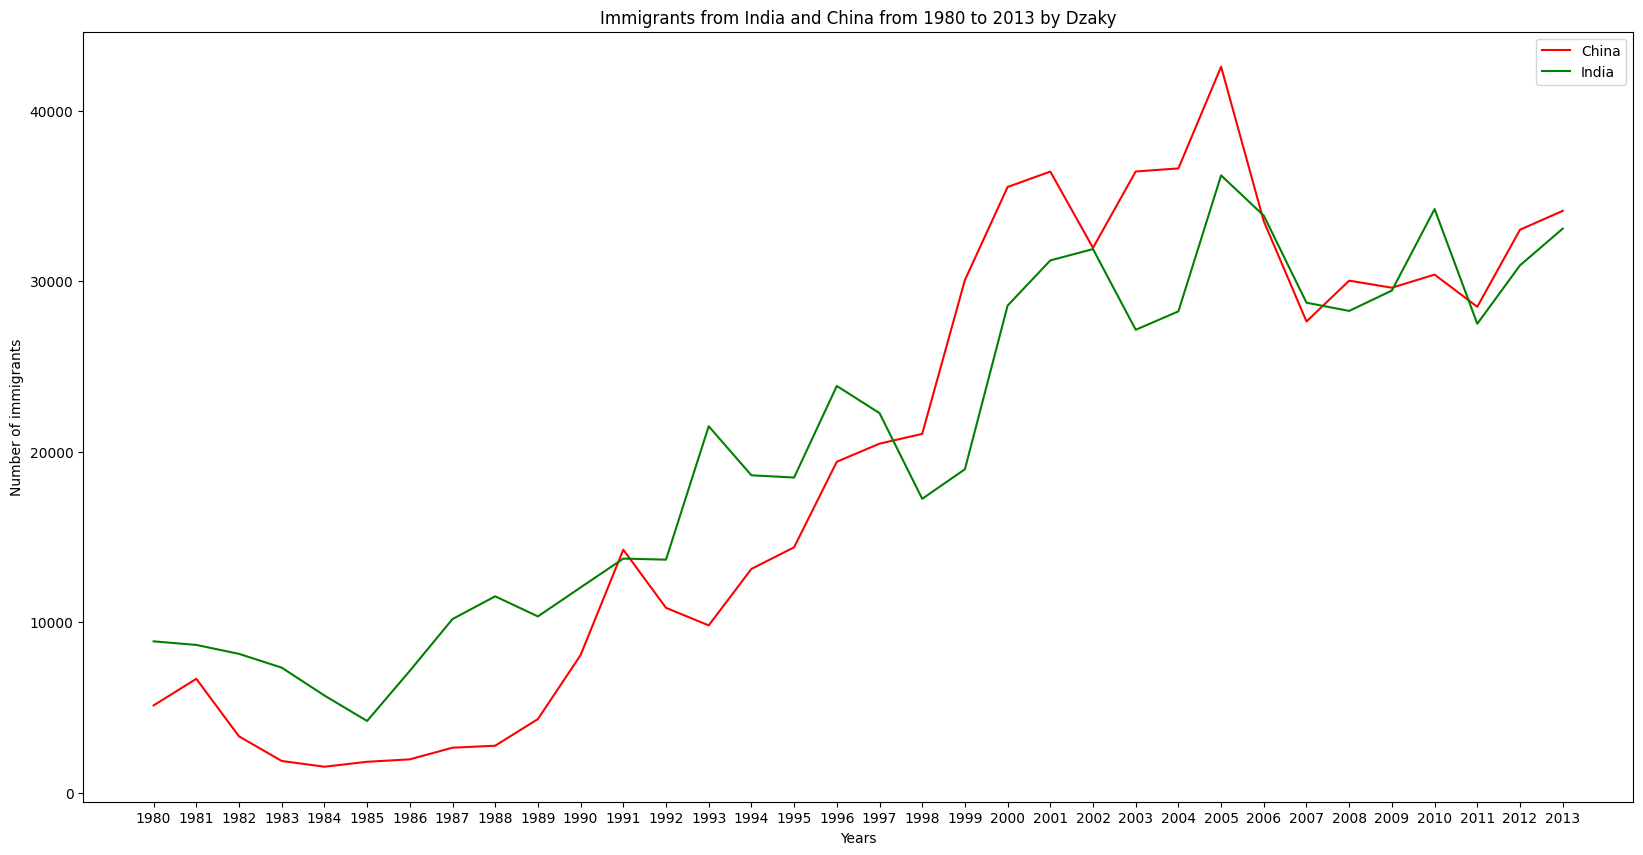

In [30]:
### type your answer here
years = list(map(str, range(1980, 2014)))
x1 = years
y1 = df_baru.iloc[0]

x2 = years
y2 = df_baru.iloc[1]

plt.figure(figsize=(20,10))
plt.plot(x1, y1, 'r-', label = "China")
plt.plot(x2, y2, 'g-', label = "India")
plt.title('Immigrants from India and China from 1980 to 2013 by Dzaky')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.legend()
plt.show() # need this line to show the updates made to the figure



**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

Step 1: Get the data set for top 5 countries

In [31]:
### type your answer here
years = list(map(str, range(1980, 2014)))





In [32]:
#df_new.head()
df_q2 = df_can.sort_values(['Total'], ascending=False)

# get the top 5 entries
df_top = df_q2.head()
df_top= df_top.drop(['Continent', 'Region', 'DevName', 'Total'], axis=1)

# transpose the dataframe
df_top = df_top.set_index('Country').T

df_top.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Step 2: Plot graph

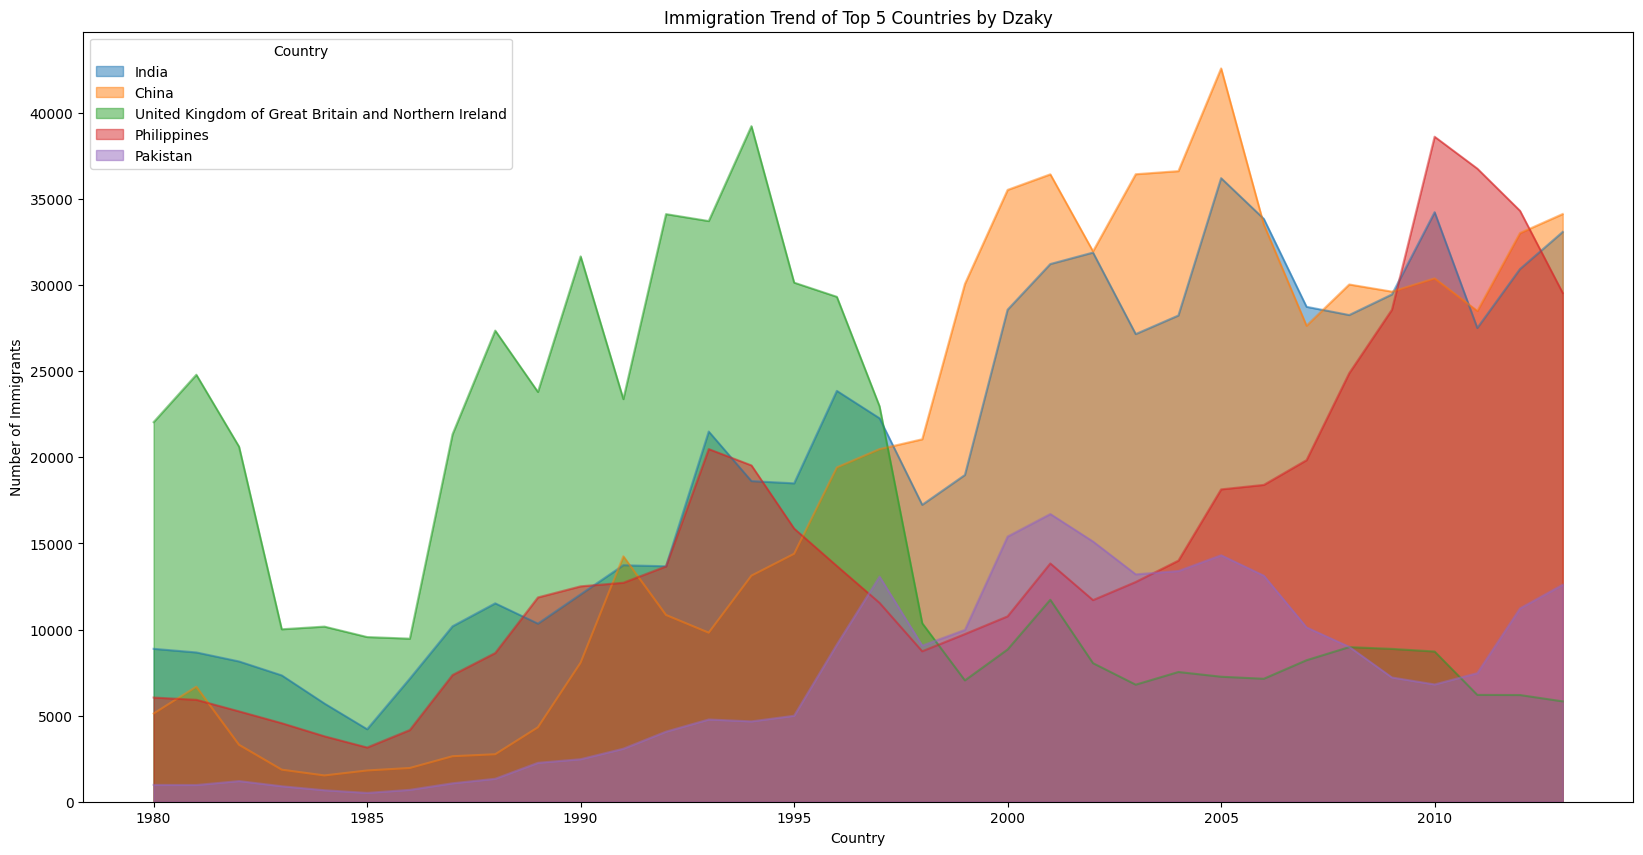

In [33]:
### type your answer here
df_top.index = df_top.index.map(str) # let's change the index values of df_top5 to type integer for plotting
df_top.plot(kind='area',
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries by Dzaky')
plt.ylabel('Number of Immigrants')
plt.xlabel('Country')

plt.show()





**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

In [34]:
### type your answer here
#df_new.head()
df_q2 = df_can.sort_values(['Total'], ascending=True)

# get the top 5 entries
df_least = df_q2.head()
df_least= df_least.drop(['Continent', 'Region', 'DevName', 'Total'], axis=1)

# transpose the dataframe
df_least = df_least.set_index('Country').T

df_least.head()





Country,Palau,Marshall Islands,Western Sahara,San Marino,New Caledonia
1980,0,0,0,1,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


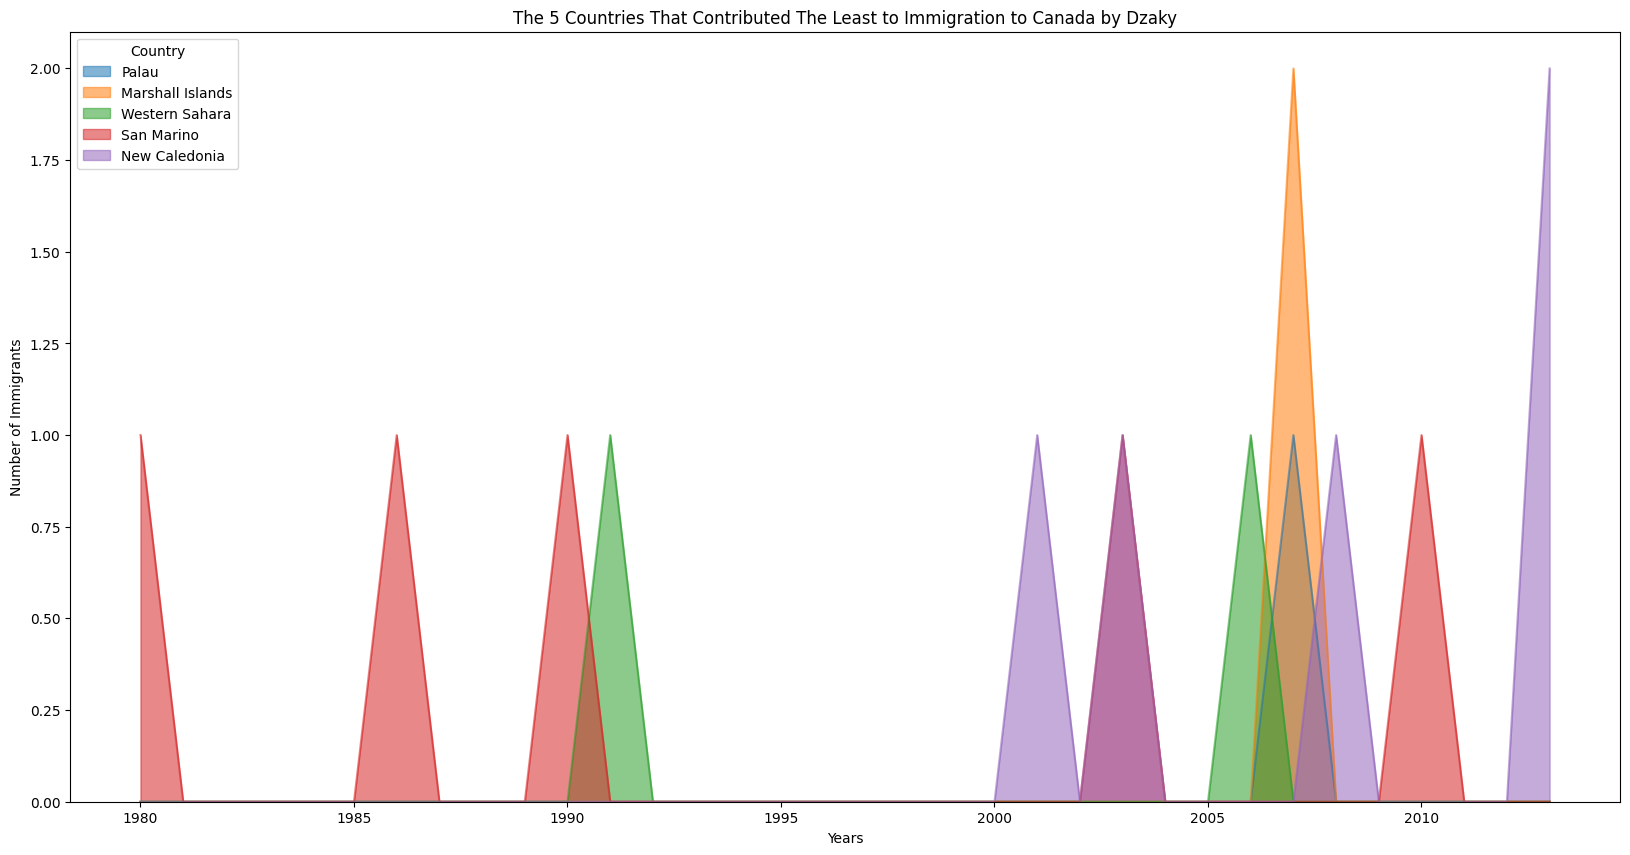

In [35]:
### type your answer here

df_least.plot(kind='area',
             alpha=0.55, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('The 5 Countries That Contributed The Least to Immigration to Canada by Dzaky')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

In [36]:
### type your answer here
df_question4 = df_can[(df_can['Country']=='Greece') | (df_can['Country']=='Albania') | (df_can['Country']=='Bulgaria')]

df_question4 =  df_question4.drop(['Continent', 'Region', 'DevName', 'Total'], axis=1)
df_question4 = df_question4.set_index('Country')
df_question4

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Bulgaria,24,20,12,33,11,24,33,52,43,85,...,2022,1738,1419,1172,994,784,556,365,451,512
Greece,1065,953,897,633,580,584,547,765,564,773,...,120,100,74,110,107,119,101,102,146,298


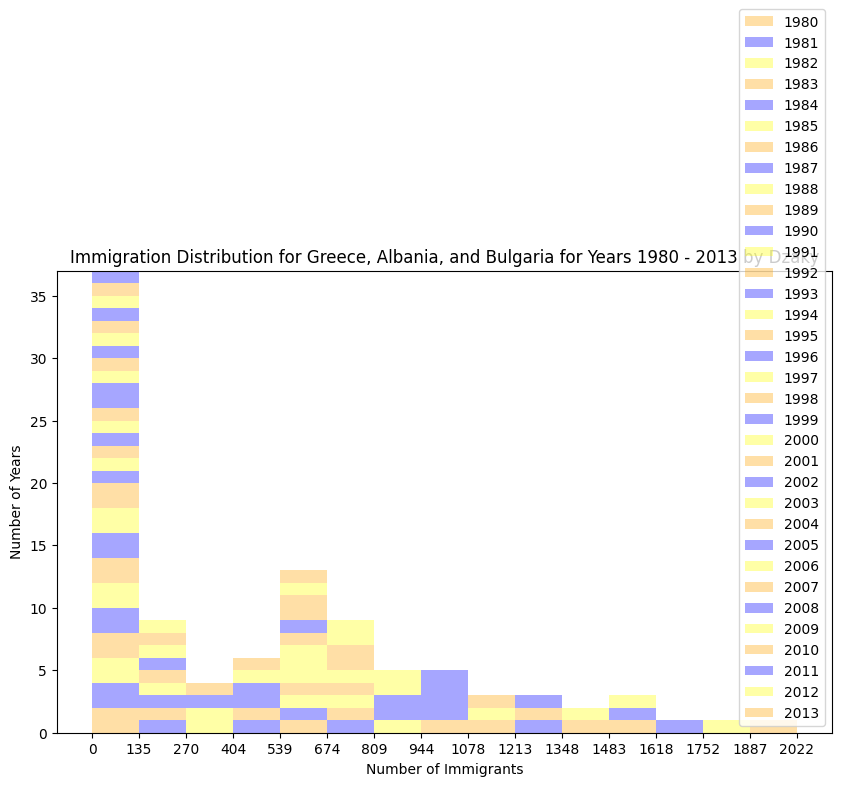

In [41]:
years = list(map(str, range(1980, 2014)))
count, bin_edges = np.histogram(df_question4, 15)
# xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes
# xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

df_question4.plot(kind='hist',
          figsize=(10, 6),
          bins=15,
          xticks=bin_edges,
          alpha = 0.35,
          color=['orange', 'blue', 'yellow'],
          stacked=True,
         )

plt.title('Immigration Distribution for Greece, Albania, and Bulgaria for Years 1980 - 2013 by Dzaky')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [38]:
### type your answer here
df_question5 = df_can.sort_values('Total', ascending = False)
df_question5 = df_question5.drop(['Continent', 'Region', 'DevName', 'Total'], axis = 1)
df_question5 = df_question5.set_index('Country')
df_question5new = df_question5.head(15).T

Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
<!--    3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface. -->

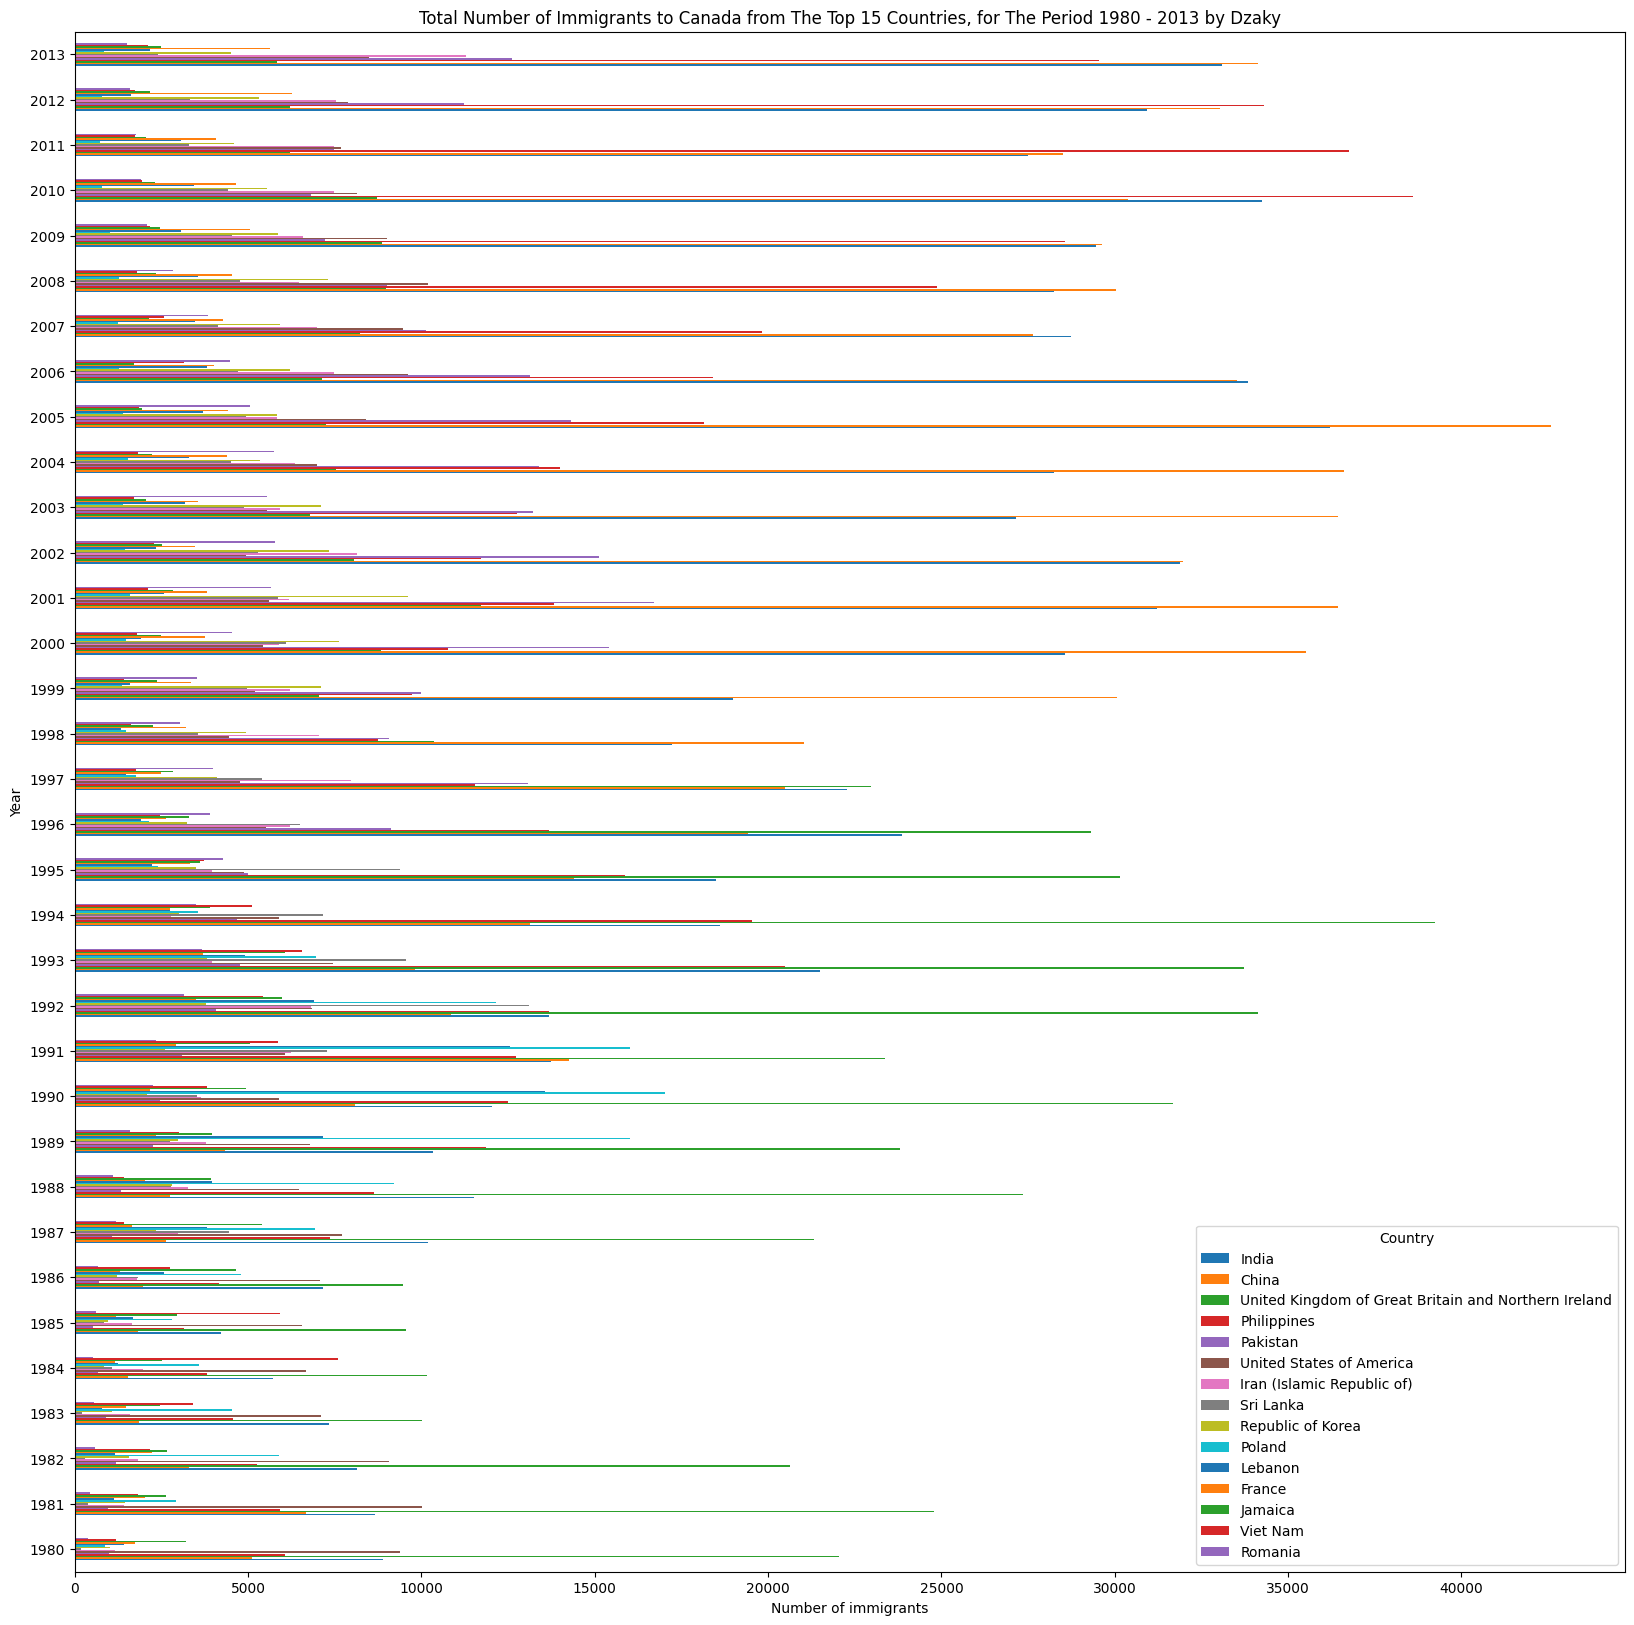

In [39]:
### type your answer here
df_question5new.plot(kind='barh', figsize=(20, 20))

plt.ylabel('Year') # add to x-label to the plot
plt.xlabel('Number of immigrants') # add y-label to the plot
plt.title('Total Number of Immigrants to Canada from The Top 15 Countries, for The Period 1980 - 2013 by Dzaky') # add title to the plot

plt.show()

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).